In [178]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# 1.) Clean the Apple Data to get a quarterly series of EPS.

In [437]:
y = pd.read_csv("AAPL_quarterly_financials.csv")

In [438]:
y.index = y.name

In [439]:
y = pd.DataFrame(y.loc["BasicEPS", :]).iloc[2:,:]

In [440]:
y.index = pd.to_datetime(y.index)

In [441]:
# CHECK IF NAS ARE NO DIVIDEND PERIOD
y = y.sort_index().fillna(0.)

In [442]:
y

,BasicEPS
1985-09-30,0.0
1985-12-31,0.004
1986-03-31,0.002
1986-06-30,0.002
1986-09-30,0.0
...,...
2022-09-30,1.29
2022-12-31,1.89
2023-03-31,1.53
2023-06-30,1.27


# 2.) Come up with 6 search terms you think could nowcast earnings. (Different than the ones I used) Add in 3 terms that that you think will not Nowcast earnings. Pull in the gtrends data

In [443]:
#!pip install pytrends
from pytrends.request import TrendReq

In [444]:
# Create pytrends object
pytrends = TrendReq(hl='en-US', tz=360)

# Set up the keywords and the timeframe
keywords = ["MacBook", "iOS", "Apple Pencil", "AirPods", "iPhone 15", "Apple Watch", "Microsoft", "Android", 
            "elephants", "mirrors", "fingernails"]# Add your keywords here
start_date = '2004-01-01'
end_date = '2024-01-01'

# Create an empty DataFrame to store the results
df = pd.DataFrame()

# Iterate through keywords and fetch data
for keyword in keywords:
    #time.sleep(5)
    pytrends.build_payload([keyword], cat=0, timeframe=f'{start_date} {end_date}', geo='', gprop='')
    interest_over_time_df = pytrends.interest_over_time()
    df[keyword] = interest_over_time_df[keyword]

In [445]:
df = df.resample("Q").mean()
df

,MacBook,iOS,Apple Pencil,AirPods,iPhone 15,Apple Watch,Microsoft,Android,elephants,mirrors,fingernails
date,,,,,,,,,,,
2004-03-31,0.000000,1.000000,0.333333,0.000000,0.000000,0.000000,90.333333,0.000000,36.000000,44.666667,74.666667
2004-06-30,0.000000,1.666667,0.333333,0.000000,0.000000,0.000000,92.000000,0.000000,31.333333,41.666667,67.000000
2004-09-30,0.000000,1.333333,0.333333,0.000000,0.000000,0.000000,83.666667,0.000000,23.000000,38.333333,69.000000
2004-12-31,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,82.000000,0.000000,29.666667,38.000000,65.000000
2005-03-31,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,83.000000,0.000000,30.333333,37.000000,68.333333
...,...,...,...,...,...,...,...,...,...,...,...
2023-03-31,79.666667,14.000000,79.666667,60.666667,4.333333,67.666667,27.000000,32.000000,17.666667,26.333333,62.666667
2023-06-30,69.333333,14.333333,56.666667,52.000000,7.000000,63.333333,26.000000,28.666667,16.666667,25.333333,55.000000
2023-09-30,78.666667,16.666667,66.666667,54.666667,43.666667,70.333333,24.666667,30.000000,14.333333,26.333333,52.000000


In [446]:
# ALIGN DATA

# I changed the "x" from the lecture to "df" in the first line... since it kept erroring

temp = pd.concat([y, df],axis = 1).dropna() 
y = temp[["BasicEPS"]].copy()
X = temp.iloc[:,1:].copy()

# 3.) Normalize all the X data

In [447]:
from sklearn.preprocessing import StandardScaler

In [448]:
scaler = StandardScaler()

In [449]:
# I changed this code from what was provided in the lecture, as the lecture code kept erroring later on... lol

X_scaled = scaler.fit_transform(X) 

# 4.) Run a Lasso with lambda of .5. Plot a bar chart.

In [450]:
from sklearn.linear_model import Lasso

## Note: 

## I did everything I could to try to get my parameters to not equal zero for lambda = 0.5, but this didn't seem to change no matter what I did.

## However, my parameters show up more on the bar graph with smaller values of lambda (as more of the parameters are nonzero), so I think that for my specific case lambda = 0.5 is just a bit big... As such, I've included 3 bar graphs after the first one to illustrate this.

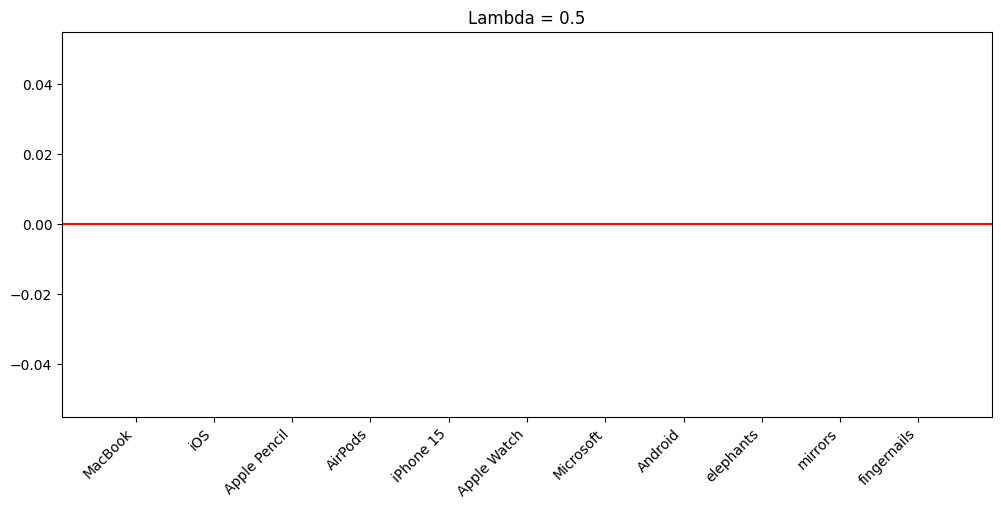

In [465]:
lasso = Lasso(alpha = 0.5)
lasso.fit(X_scaled, y)
coefficients = lasso.coef_ #edited lecture code again...


plt.figure(figsize=(12, 5))
plt.bar(X.columns, coefficients)
plt.xticks(rotation=45, ha='right')
plt.axhline(0, color="red")
plt.title("Lambda = 0.5")

plt.show()

## Note: everything under here is just the same graph, but with decreasing values of lambda.

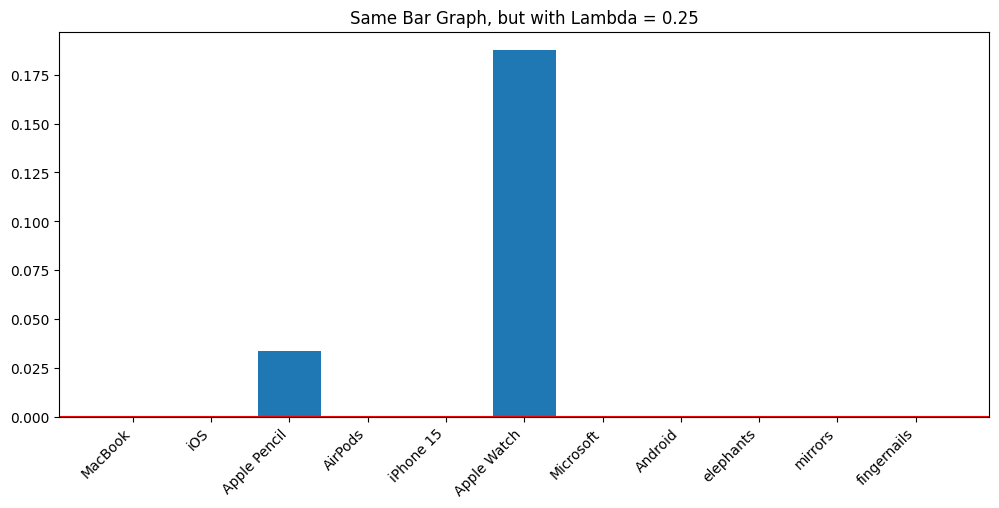

In [466]:
lasso = Lasso(alpha = 0.25)
lasso.fit(X_scaled, y)
coefficients = lasso.coef_ 

plt.figure(figsize=(12, 5))
plt.bar(X.columns, coefficients)
plt.xticks(rotation=45, ha='right')
plt.axhline(0, color="red")
plt.title("Same Bar Graph, but with Lambda = 0.25")
plt.show()

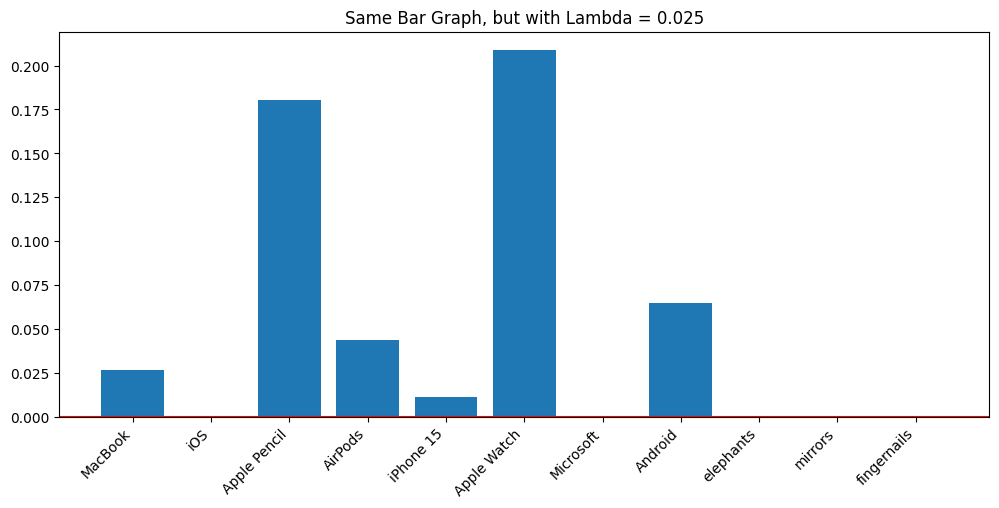

In [467]:
lasso = Lasso(alpha = 0.025)
lasso.fit(X_scaled, y)
coefficients = lasso.coef_ 

plt.figure(figsize=(12, 5))
plt.bar(X.columns, coefficients)
plt.xticks(rotation=45, ha='right')
plt.axhline(0, color="red")
plt.title("Same Bar Graph, but with Lambda = 0.025")
plt.show()

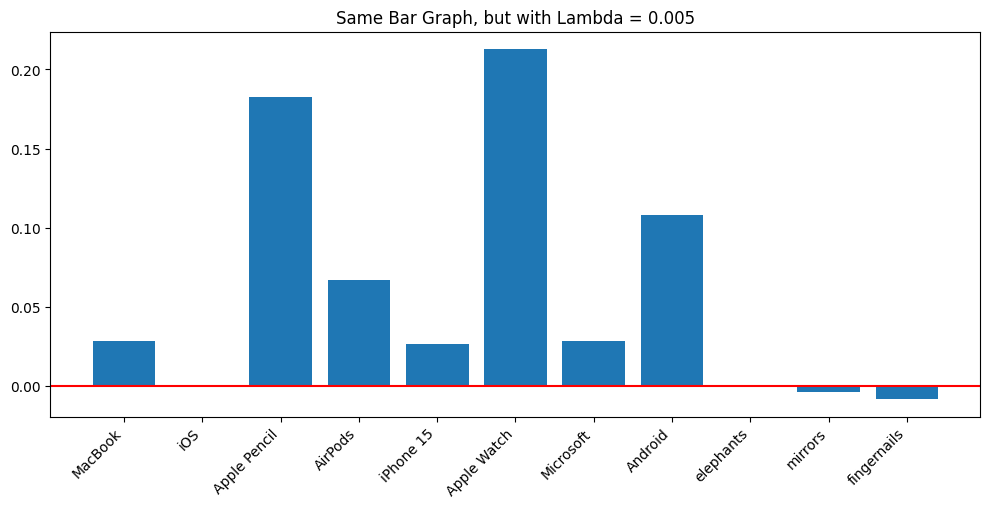

In [468]:
lasso = Lasso(alpha = 0.005)
lasso.fit(X_scaled, y)
coefficients = lasso.coef_ 

plt.figure(figsize=(12, 5))
plt.bar(X.columns, coefficients)
plt.xticks(rotation=45, ha='right')
plt.axhline(0, color="red")
plt.title("Same Bar Graph, but with Lambda = 0.005")
plt.show()

# 5.) Do these coefficient magnitudes make sense?

These coefficient magnitudes make sense. The lambda value in Lasso regression determines how strongly the regularization term influences the model. A higher alpha causes more parameters to equal zero, which then results in a simpler model, but a lower alpha would cause less parameters to equal zero and would result in a more complex model. 

As such, our coefficient magnitudes in these graphs make sense. We can see that at lambda = 0.5, all of our parameters equal zero, which indicates that setting lambda to 0.5 imposed a strong penalty on coefficients and pushed many of them to zero. Meanwhile, as our lambda decreases to 0.25, and then to 0.025 and 0.005, we can see that the regularization effect weakens, resulting in a higher number of non-zero coefficients for each model with a smaller lambda. This effect can be seen in the bar graphs.